In [38]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from matplotlib import transforms

from pandas.tools.plotting import scatter_matrix
from pandas.tools.plotting import radviz
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import andrews_curves

In [110]:
sns.set()
sns.set_style("white", rc={
    'axes.grid': False,
    'axes.labelcolor': '0.6',
    'axes.edgecolor': '0.6',
    'axes.facecolor': '1.0',
    'text.color': '0.6',
    'axes.linewidth': 1,

    'xtick.color': '0.6',
    'xtick.direction': u'in',
    'xtick.major.size': 0.0,
    'xtick.minor.size': 0.0,

    'ytick.color': '0.6',
    'ytick.direction': u'in',
    'ytick.major.size': 0.0,
    'ytick.minor.size': 0.0,

    'font.family': [u'sans-serif'],
    'font.sans-serif': [u'Roboto'],
})
palette = sns.color_palette("Spectral_r", 350)
sns.set_palette(palette)
sns.set_context("notebook", font_scale=1.25)

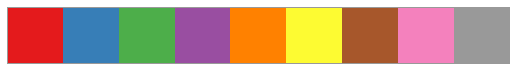

In [181]:
sns.choose_colorbrewer_palette("qualitative", as_cmap=False)

In [111]:
log_path = "logs_635748225414105270"

In [197]:
columns = ["generation", "species_id",
           "fitness", "adjusted_fitness", "best_duration",
           "complexity", "neuron_count", "synapse_count"]
df = pd.read_csv("%s/populations.csv" % log_path, header=None, names=columns)
df = df[df["fitness"] > 0.015]

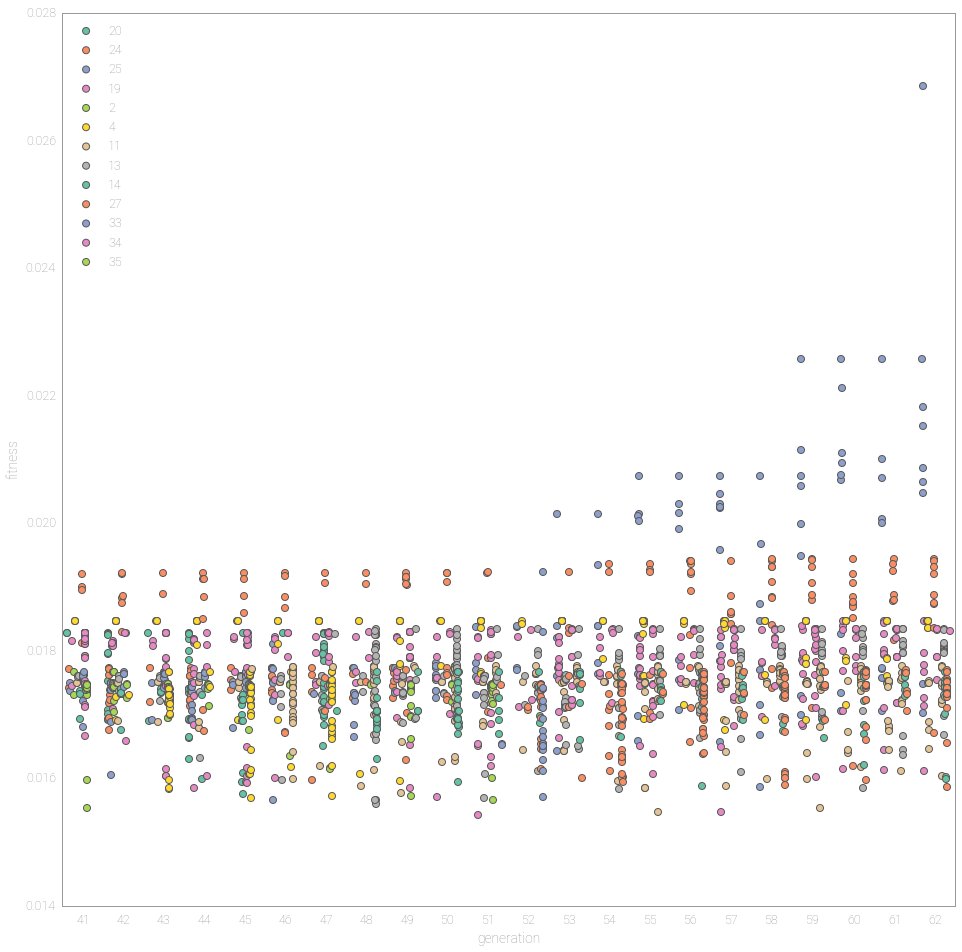

In [209]:
fig = plt.figure(figsize=(16, 16))
sns.stripplot(x="generation", y="fitness", hue="species_id", data=df[df["generation"] > 40], jitter=True, edgecolor="gray", palette="Set2")
plt.legend(loc="upper left")

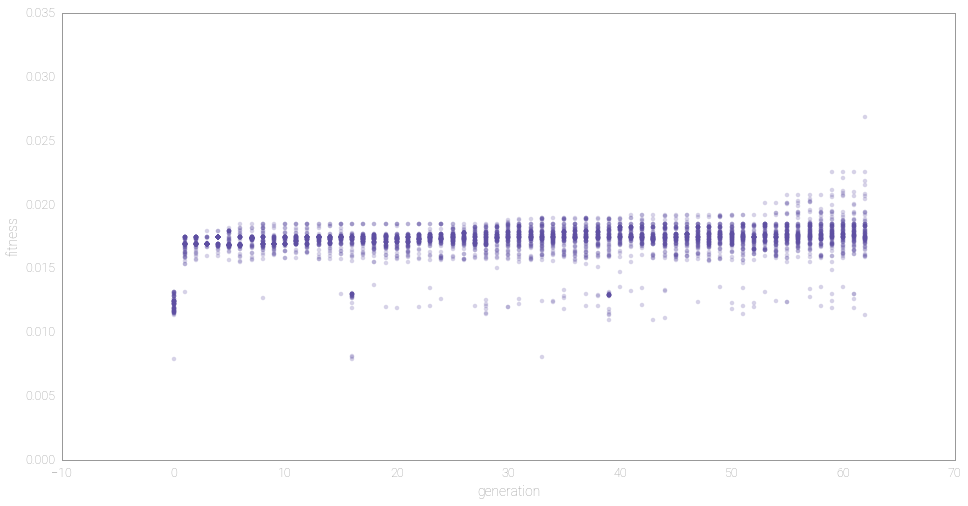

In [113]:
df.plot(kind="scatter", x="generation", y="fitness", figsize=(16, 8), linewidth=0, grid=False, alpha=0.25)

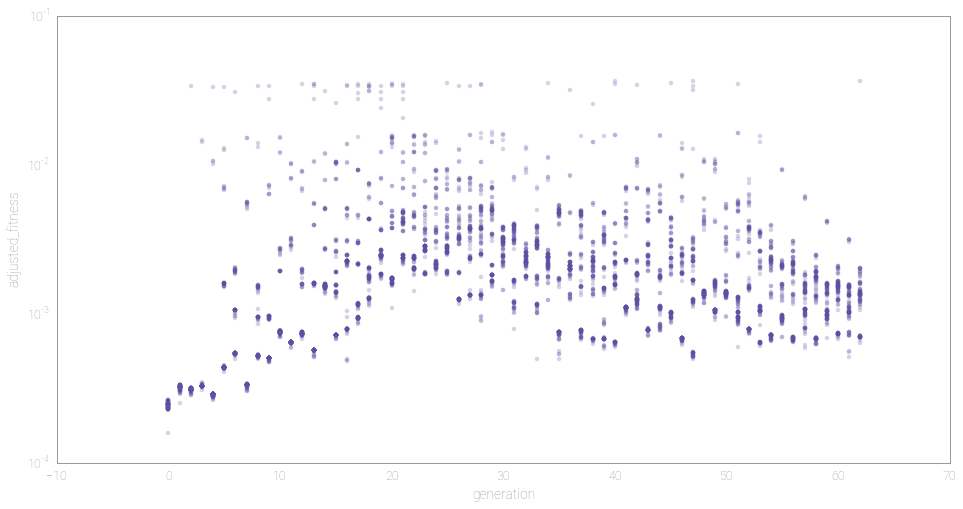

In [114]:
df.plot(kind="scatter", x="generation", y="adjusted_fitness", logy=True, figsize=(16, 8), linewidth=0, grid=False, alpha=0.25)

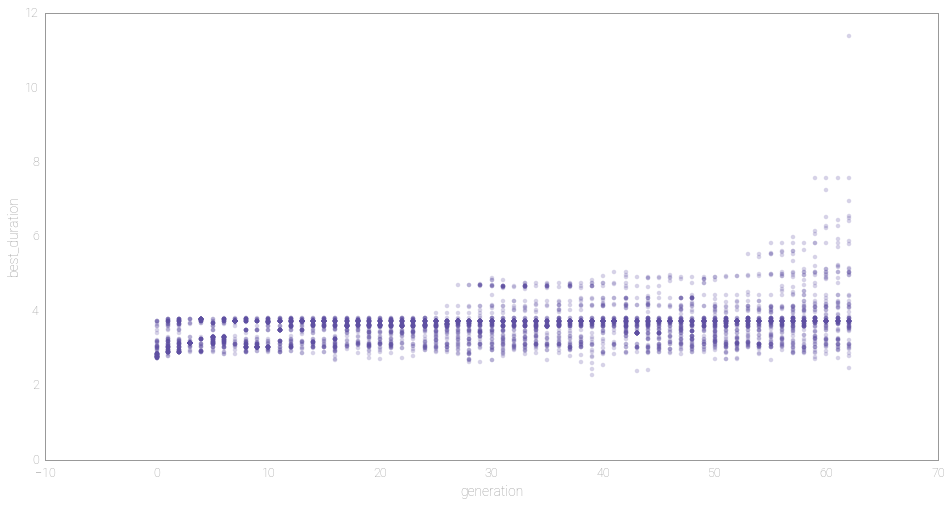

In [115]:
df.plot(kind="scatter", x="generation", y="best_duration", figsize=(16, 8), linewidth=0, grid=False, alpha=0.25)

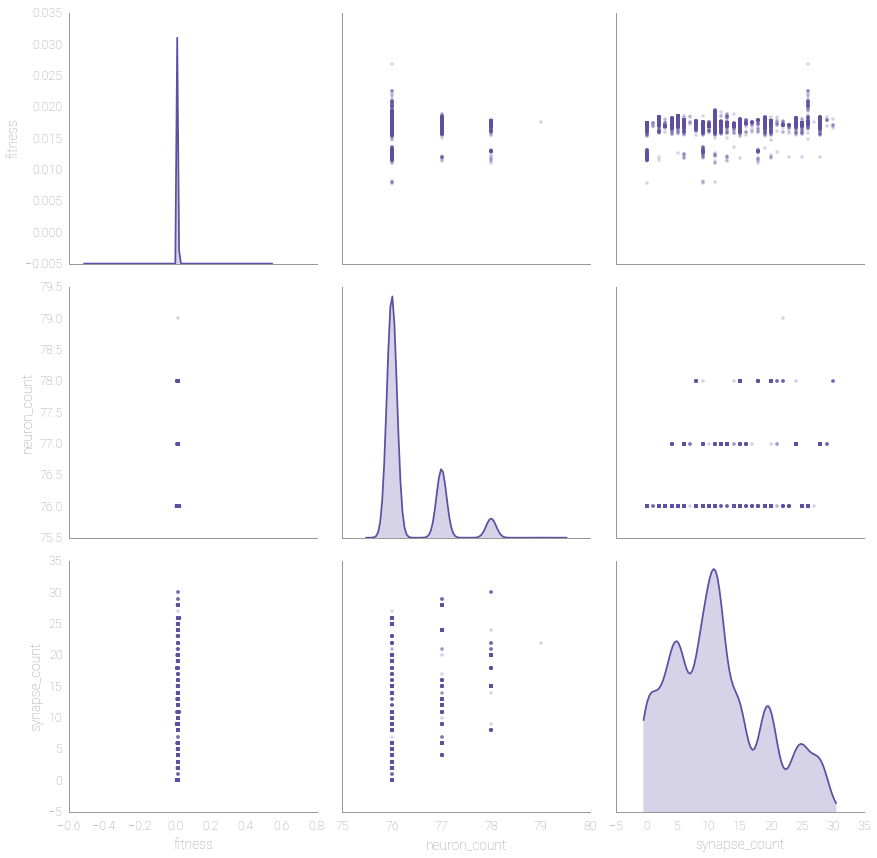

In [116]:
sns.pairplot(df,
             vars=["fitness", "neuron_count", "synapse_count"],
             kind="scatter", diag_kind="kde", markers=".",
             size=4,
             diag_kws=dict(shade=True),
             plot_kws=dict(s=50, linewidth=0, alpha=0.25))

In [117]:
columns = ["generation",
           "best_fitness", "best_mean_duration",
           "mean_adjusted_fitness", "stdev_adjusted_fitness",
           "mean_fitness", "stdev_fitness",
           "mean_complexity", "stdev_complexity",
           "mean_neuron_count", "stdev_neuron_count",
           "mean_synapse_count", "stdev_synapse_count"]
raw = pd.read_csv("%s/generations.csv" % log_path, header=None, names=columns)
df = pd.DataFrame(raw[["best_fitness", "best_mean_duration", "mean_adjusted_fitness", "stdev_adjusted_fitness", "mean_fitness", "stdev_fitness", "mean_complexity", "stdev_complexity"]], index=raw["generation"])

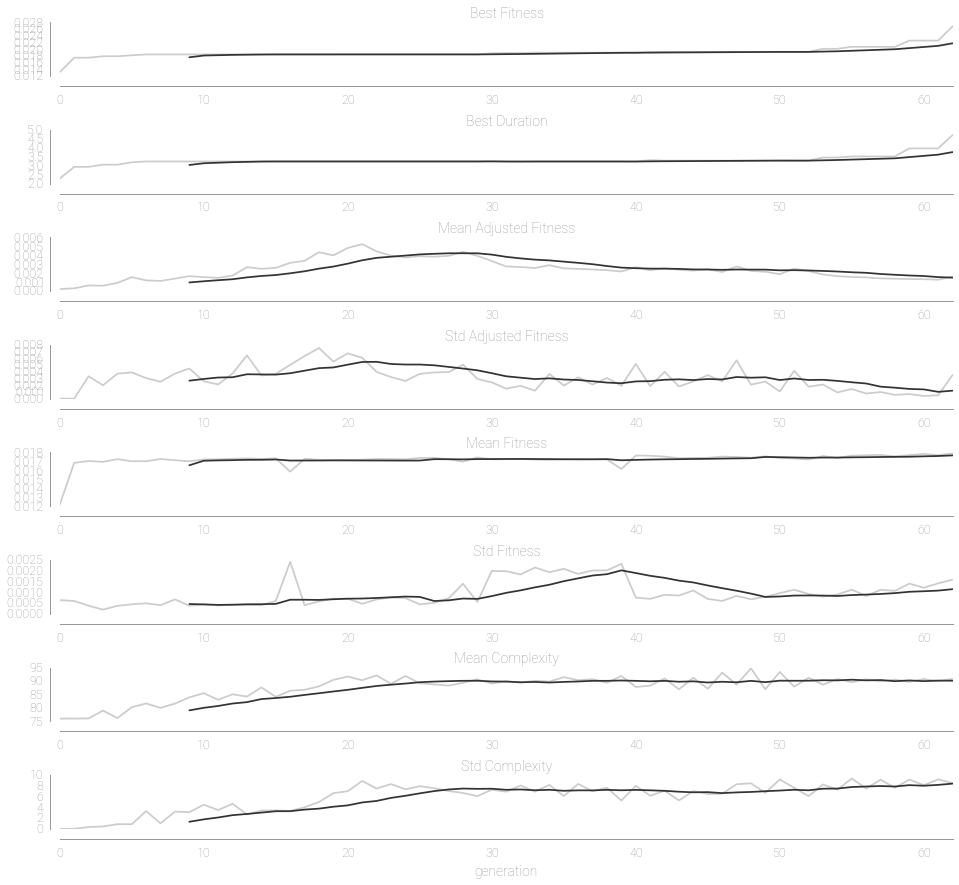

In [118]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(16, 16))
fig.subplots_adjust(hspace=1)

rolling = pd.rolling_mean(df, 10)

df.plot(subplots=True, ax=axes, grid=False, legend=False, sharex=True, color="0.8")
rolling.plot(subplots=True, ax=axes, grid=False, legend=False, sharex=True, color="0.2")

axes[0].set_title("Best Fitness", fontsize=14)
axes[1].set_title("Best Duration", fontsize=14)
axes[2].set_title("Mean Adjusted Fitness", fontsize=14)
axes[3].set_title("Std Adjusted Fitness", fontsize=14)
axes[4].set_title("Mean Fitness", fontsize=14)
axes[5].set_title("Std Fitness", fontsize=14)
axes[6].set_title("Mean Complexity", fontsize=14)
axes[7].set_title("Std Complexity", fontsize=14)

sns.despine(offset=10)

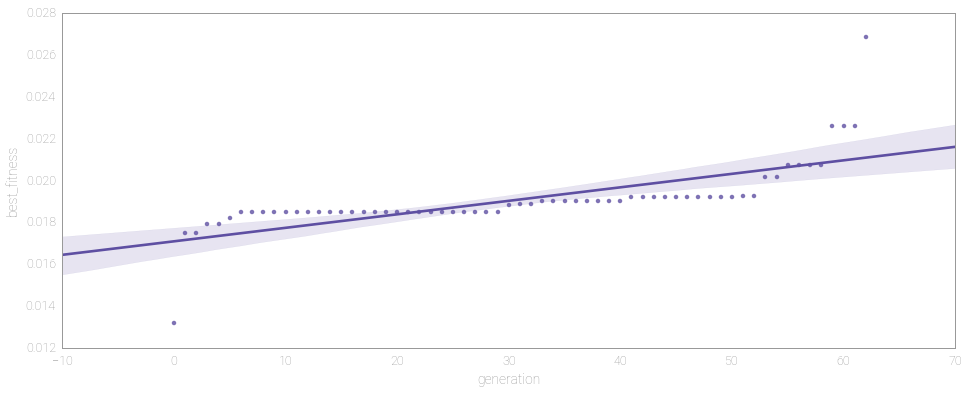

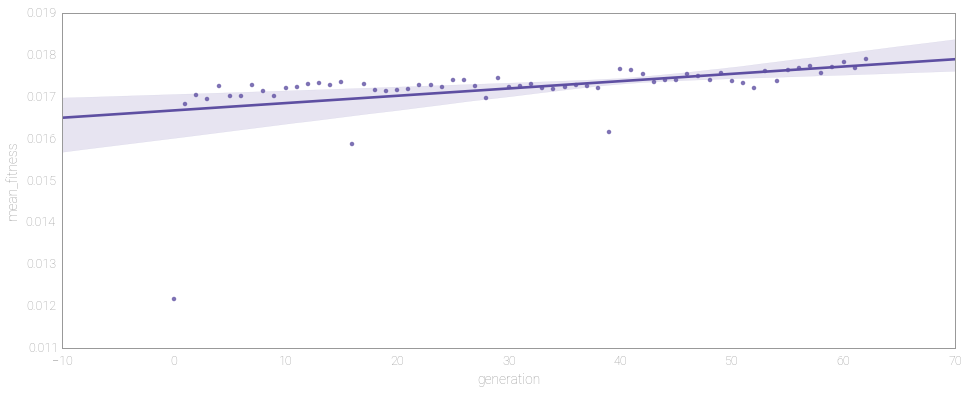

In [119]:
plt.figure(figsize=(16, 6))
sns.regplot("generation", "best_fitness", raw)

plt.figure(figsize=(16, 6))
sns.regplot("generation", "mean_fitness", raw)

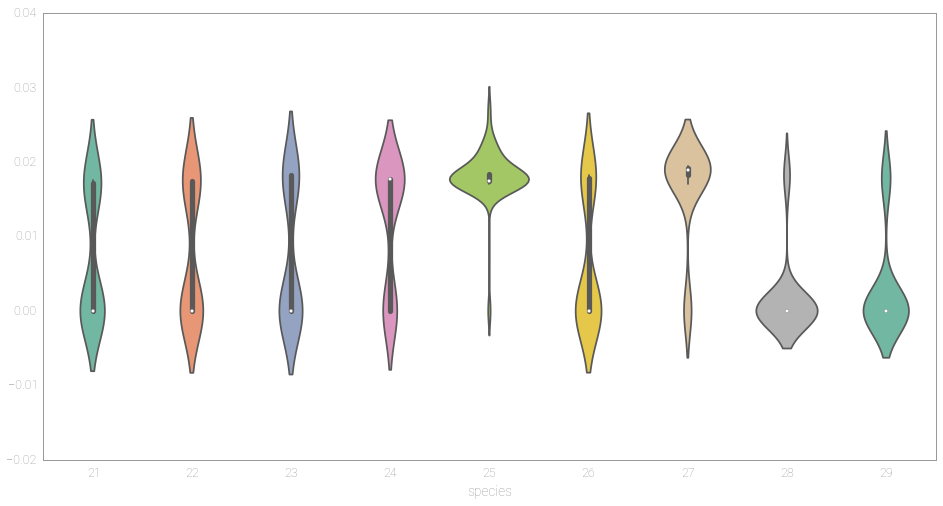

In [163]:
data = pd.read_csv("%s/species.csv" % log_path, header=None, names=["generation", "species", "size", "best_fitness", "mean_fitness", "adjusted_fitness", "complexity"])
data = data[data["species"] > 20]
data = data[data["species"] < 30]

df = data.groupby(["generation", "species"])["best_fitness"].first().unstack("species").fillna(0)

plt.figure(figsize=(16, 8))
sns.violinplot(data=df, palette="Set2")

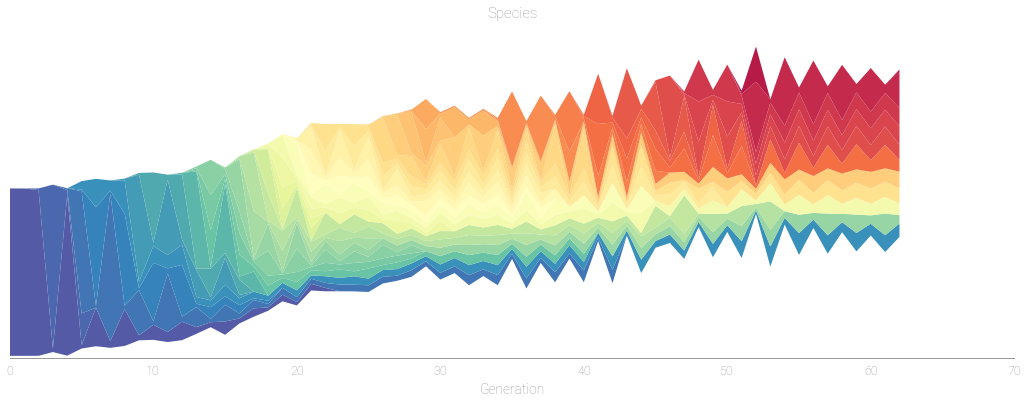

In [121]:
data = pd.read_csv("%s/species.csv" % log_path, header=None, names=["generation", "species", "size", "best_fitness", "mean_fitness", "adjusted_fitness", "complexity"])
df = data.groupby(["generation", "species"])["size"].first().unstack("species").fillna(0)

X = df.index.values
Y = [df[c] for c in df.columns.values]

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)

palette = sns.color_palette("Spectral_r", len(df.columns.values))
plt.stackplot(X, *Y, colors=palette, baseline="wiggle", color="0.2", linewidths=0)
plt.title("Species")

ax.set_xlabel("Generation")
ax.set_ylabel("Species Size")
ax.get_yaxis().set_visible(False)

sns.despine(left=True, trim=True)